In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd, numpy as np, seaborn as sns

In [4]:
import GPy

In [50]:
class GPTwoSample(GPy.core.Model):
    def __init__(self, Xlist, Ylist, kernel):
        super(GPTwoSample, self).__init__(name='gptwosample')
        self.shared = GPy.models.GPRegression(np.concatenate(Xlist), np.concatenate(Ylist), kernel=kernel.copy())
        self.shared.name = "shared"
        X_ind = np.concatenate(Xlist)
        X_ind = np.c_[X_ind, np.zeros(X_ind.shape[0])]
        curr = 0
        for i, X in enumerate(Xlist):
            X_ind[curr:curr+X.shape[0],-1] = i
            curr += X.shape[0]
        independent_kernel = GPy.kern.IndependentOutputs(kernel.copy())
        self.independent = GPy.models.GPRegression(X_ind, np.concatenate(Ylist), kernel=independent_kernel.copy())
        self.independent.name = "independent"
        
        self.link_parameters(self.shared, self.independent) 
        
    def log_likelihood(self):
        return self.shared.log_likelihood() + self.independent.log_likelihood()

In [51]:
Xlist = [np.random.uniform(-2,2,np.random.randint(30,60))[:,None] for i in range(2)]
Ylist = [np.sin(X) + np.random.normal(0,.05,(X.shape[0],1)) for X in Xlist]

Ylist2 = [np.sin(X) + np.random.normal(0,.05,(X.shape[0],1)) for X in Xlist]
Ylist2[1][Ylist2[1] > 0] = -Ylist2[1][Ylist2[1] > 0]

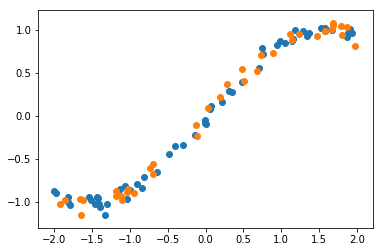

In [52]:
plt.scatter(Xlist[0],Ylist[0])
plt.scatter(Xlist[1],Ylist[1])

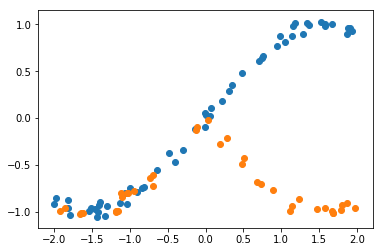

In [53]:
plt.scatter(Xlist[0],Ylist2[0])
plt.scatter(Xlist[1],Ylist2[1])

In [61]:
m = GPTwoSample(Xlist, Ylist2, GPy.kern.RBF(1))

In [66]:
m.optimize(messages=1)

 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/

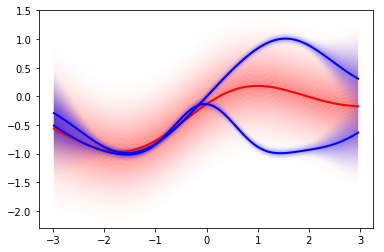

In [80]:
fig, ax = plt.subplots(1,1)
m.shared.plot_mean(ax=ax, color='r', label=False)
m.shared.plot_density(ax=ax, color='r', label="Shared")
m.independent.plot_mean(visible_dims=[0], ax=ax, fixed_inputs=[[1,0]], color='b', label=False)
m.independent.plot_density(visible_dims=[0], ax=ax, fixed_inputs=[[1,0]], color='b', label="Independent")
m.independent.plot_mean(visible_dims=[0], ax=ax, fixed_inputs=[[1,1]], color='b', label=False)
m.independent.plot_density(visible_dims=[0], ax=ax, fixed_inputs=[[1,1]], color='b', label=False)


In [81]:
m.shared.log_likelihood() - m.independent.log_likelihood()

-185.2248040178648

In [82]:
m2 = GPTwoSample(Xlist, Ylist, GPy.kern.RBF(1))
m2.optimize()
m2.shared.log_likelihood() - m2.independent.log_likelihood()

12.668135854333286

 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/plot_definitions.py:268: MatplotlibDeprecationWarning:Moved to matplotlib.cbook
 /home/max/GPy/GPy/plotting/matplot_dep/

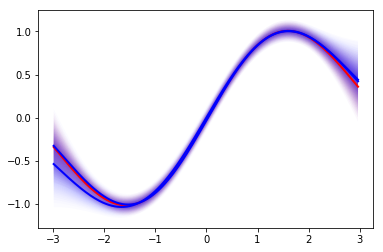

In [83]:
fig, ax = plt.subplots(1,1)
m2.shared.plot_mean(ax=ax, color='r', label=False)
m2.shared.plot_density(ax=ax, color='r', label="Shared")
m2.independent.plot_mean(visible_dims=[0], ax=ax, fixed_inputs=[[1,0]], color='b', label=False)
m2.independent.plot_density(visible_dims=[0], ax=ax, fixed_inputs=[[1,0]], color='b', label="Independent")
m2.independent.plot_mean(visible_dims=[0], ax=ax, fixed_inputs=[[1,1]], color='b', label=False)
m2.independent.plot_density(visible_dims=[0], ax=ax, fixed_inputs=[[1,1]], color='b', label=False)
